# SQL

## Описание проекта
Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать. Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. 

## Цель
Проанализировать базу данных. В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

## Описание данных

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

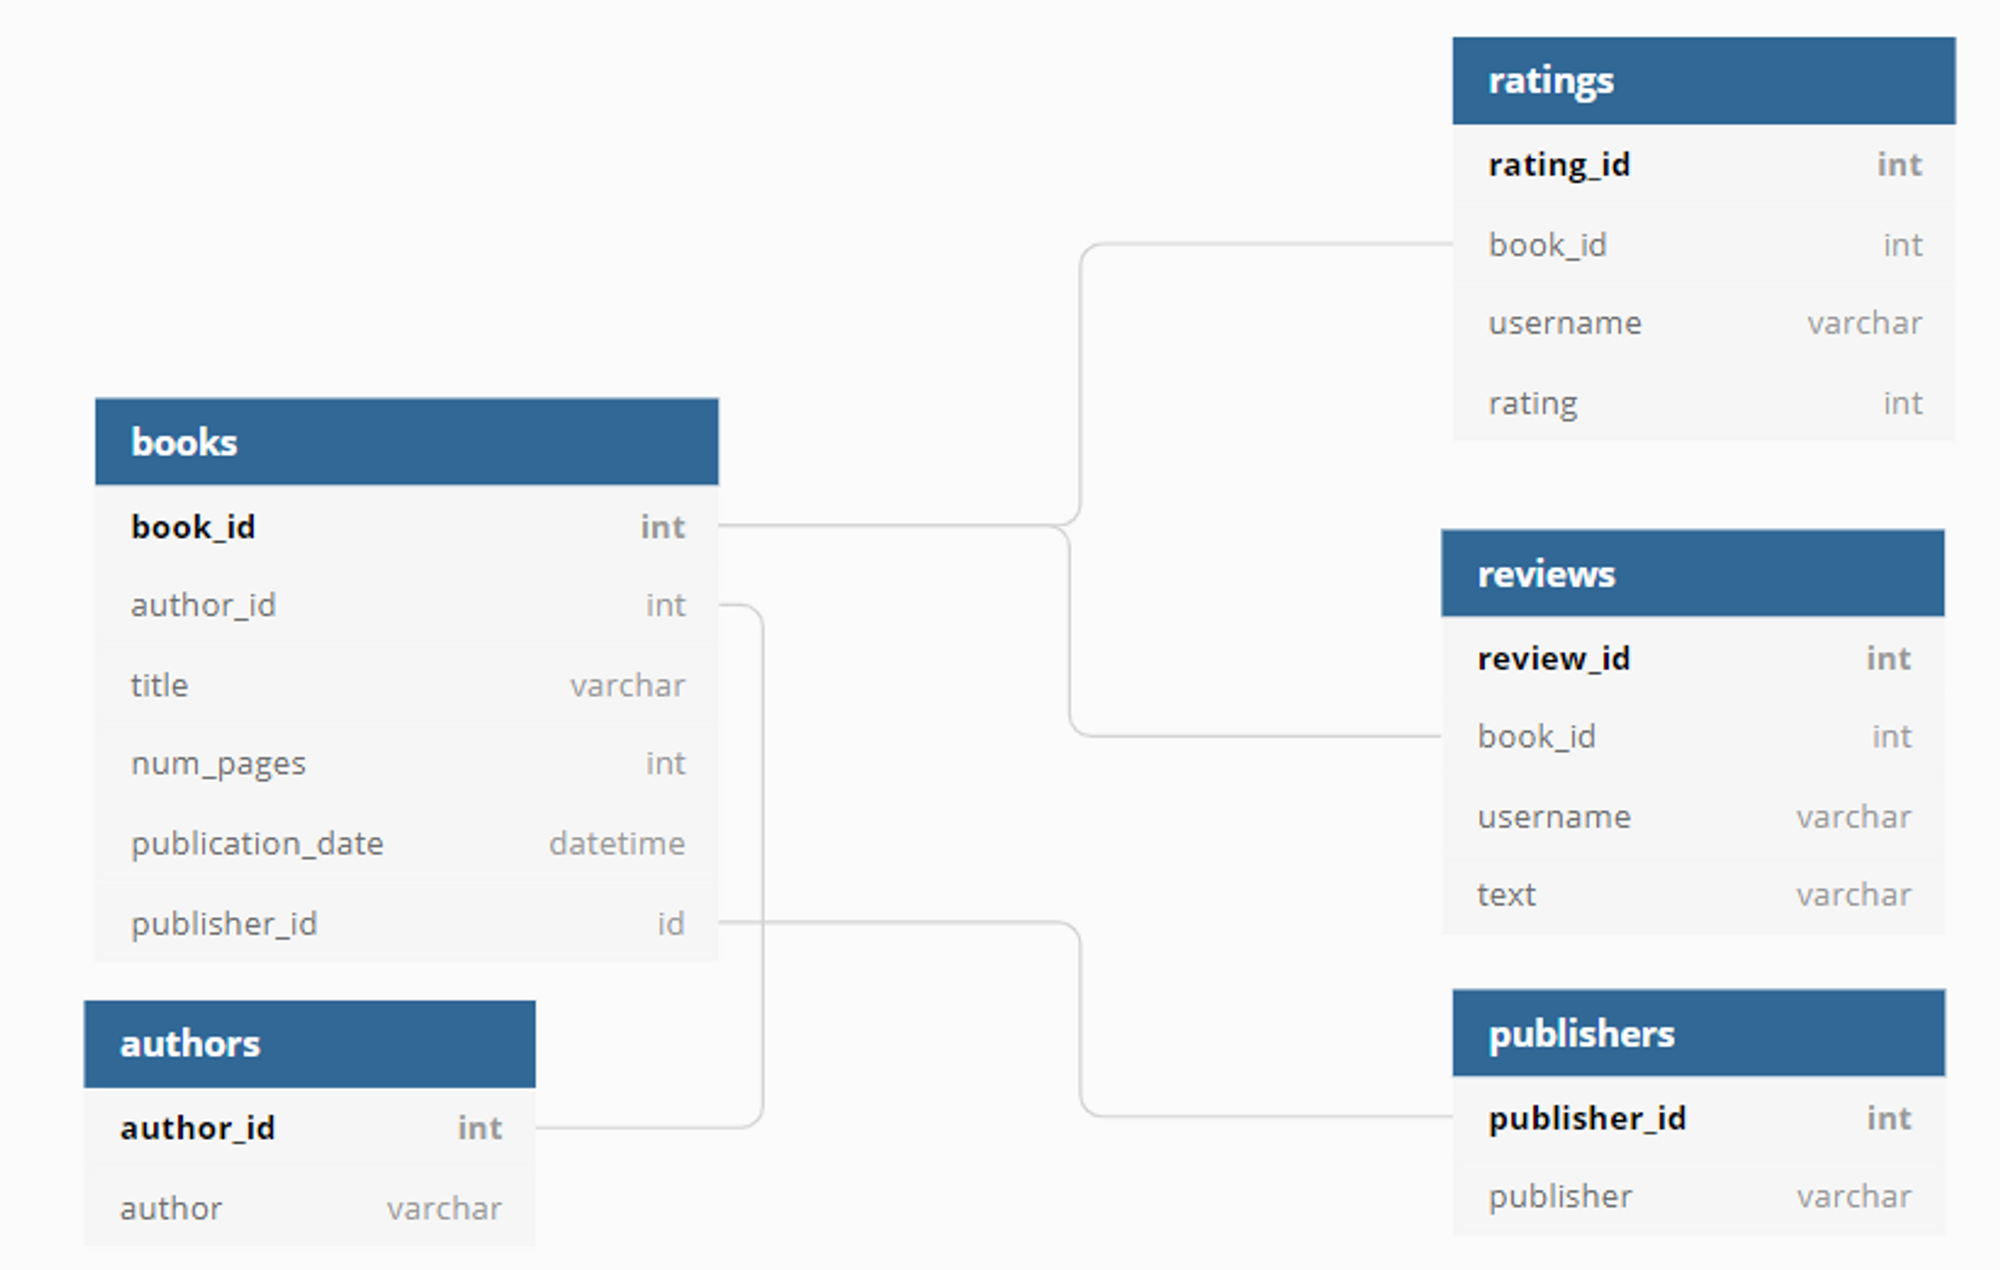

## Задания

- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.


In [1]:
import pandas as pd
from sqlalchemy import create_engine
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор


In [2]:
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

## Исследуем таблицы и выведем первые строки

In [3]:
pd.io.sql.read_sql(''' 

SELECT * 
FROM books
LIMIT 5

''', con = engine) 

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [4]:
pd.io.sql.read_sql(''' 

SELECT * 
FROM authors
LIMIT 5

''', con = engine) 

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [5]:
pd.io.sql.read_sql(''' 

SELECT * 
FROM publishers
LIMIT 5

''', con = engine) 

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [6]:
pd.io.sql.read_sql(''' 

SELECT * 
FROM ratings
LIMIT 5

''', con = engine) 

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [7]:
pd.io.sql.read_sql(''' 

SELECT * 
FROM reviews
LIMIT 5

''', con = engine) 

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


## Решение задач

__Посчитайте, сколько книг вышло после 1 января 2000 года.__

In [8]:
pd.io.sql.read_sql('''

SELECT COUNT(book_id)
FROM books
WHERE publication_date > '2000-01-01'
LIMIT 5

''', con = engine) 

,count
0,819


819 книг вышло после 1 января 2000 года.

__Для каждой книги посчитайте количество обзоров и среднюю оценку.__

In [9]:
pd.io.sql.read_sql('''

SELECT e.title, 
       COUNT(rev.review_id), 
       e.avg
FROM (SELECT b.title,
             b.book_id,
             AVG(rat.rating)
      FROM books AS b
      LEFT JOIN ratings AS rat ON b.book_id=rat.book_id
      GROUP BY b.book_id) AS e
LEFT JOIN reviews AS rev ON e.book_id=rev.book_id
GROUP BY e.avg, 
         e.title
ORDER BY e.avg DESC

''', con = engine) 

,title,count,avg
0,A Woman of Substance (Emma Harte Saga #1),2,5.00
1,The Woman in Black,2,5.00
2,Stolen (Women of the Otherworld #2),2,5.00
3,Hard Times,2,5.00
4,Emily of New Moon (Emily #1),2,5.00
...,...,...,...
995,The World Is Flat: A Brief History of the Twen...,3,2.25
996,His Excellency: George Washington,2,2.00
997,Junky,2,2.00
998,Drowning Ruth,3,2.00


__Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры.__

In [10]:
pd.io.sql.read_sql('''

SELECT p.publisher, 
       COUNT(b.book_id)
FROM books AS b
JOIN publishers AS p ON b.publisher_id = p.publisher_id
WHERE num_pages > 50
GROUP BY p.publisher
ORDER BY COUNT(b.book_id) DESC
LIMIT 1

''', con = engine) 

,publisher,count
0,Penguin Books,42


Издательство Penguin Books выпустило наибольшее число книг толще 50 страниц.

__Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками.__

In [11]:
pd.io.sql.read_sql('''

SELECT aut.author,
       AVG(rat.rating)
FROM books AS b
JOIN ratings AS rat ON b.book_id=rat.book_id
JOIN authors AS aut ON b.author_id=aut.author_id
GROUP BY aut.author
HAVING COUNT(rating_id)>50
ORDER BY AVG(rating) DESC
LIMIT 1

''', con = engine) 

,author,avg
0,J.K. Rowling/Mary GrandPré,4.288462


Автором с самой высокой средней оценкой книг является J.K. Rowling.

__Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.__

In [12]:
pd.io.sql.read_sql('''

WITH a AS(SELECT COUNT(review_id) AS rew_cnt,
                 username
          FROM reviews
          WHERE username IN (SELECT username 
                             FROM (SELECT COUNT(rating_id),
                                          username
                                   FROM ratings AS r 
                                   GROUP BY 2
                                   HAVING COUNT(rating_id)>50) AS a)
                             GROUP BY 2)
SELECT AVG(rew_cnt) FROM a;

''', con = engine) 

,avg
0,24.333333


Среднее количество обзоров от пользователей, которые поставили больше 50 оценок - 24.3.

## Вывод:  
- 819 книг вышло после 1 января 2000 года  
- Для каждой книги посчитали количество обзоров и среднюю оценку  
- Издательство Penguin Books выпустило наибольшее число книг толще 50 страниц  
- Автором с самой высокой средней оценкой книг является J.K. Rowling  
- Среднее количество обзоров от пользователей, которые поставили больше 50 оценок - 24.3